# Heart Disease Prediction

About
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


Attribute Information:

> 1.age = age in years

> 2.sex= (1 = male; 0 = female)

> 3.cp = chest pain type

> 4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

> 5.chol = serum cholestoral in mg/dl

> 6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> 7.restecg = resting electrocardiographic results

> 8.thalach = maximum heart rate achieved

> 9.exang = exercise induced angina (1 = yes; 0 = no)

> 10.oldpeak = ST depression induced by exercise relative to rest

> 11.slope = the slope of the peak exercise ST segment

> 12.ca = number of major vessels (0-3) colored by flourosopy

> 13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

> 14.target = 1 or 0

# Data Exploration

In [35]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('heart.csv')

In [37]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

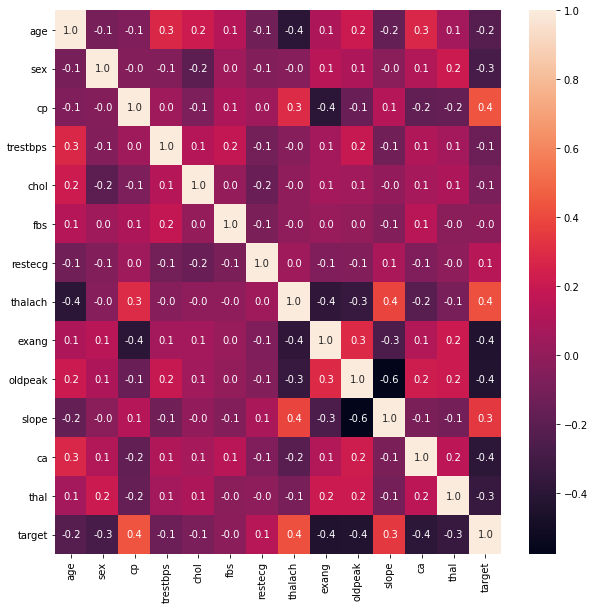

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [41]:
#age analysis
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

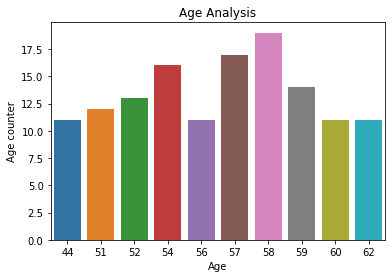

In [42]:
sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [43]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [44]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients dont have heart disease: {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients dont have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


In [45]:
countFemale= len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("% of Female Patients: {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("% of male Patients: {:.2f}%".format((countMale/(len(df.sex))*100)))

% of Female Patients: 31.68%
% of male Patients: 68.32%


In [46]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 16
middle ages 128
elderly ages 159


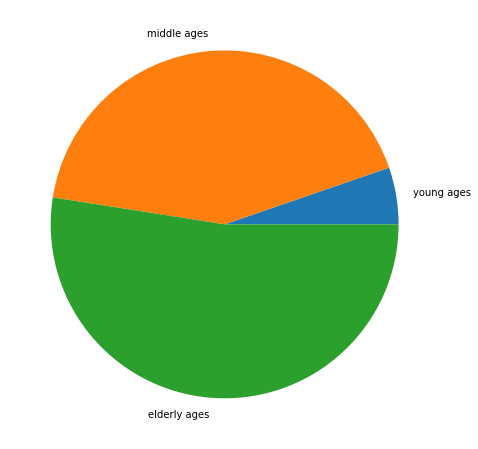

In [47]:
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

In [48]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [49]:
df.target.unique()

array([1, 0], dtype=int64)

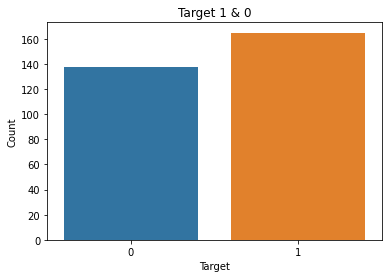

In [50]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
x_data = df.drop(['target'], axis = 1)
y = df.target.values

[0.07165832 0.05508411 0.12249848 0.06008241 0.06109081 0.02073714
 0.0378779  0.09068597 0.10135747 0.0870328  0.06132819 0.12623909
 0.1043273 ]


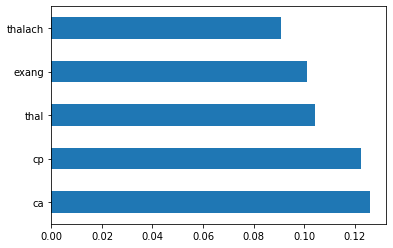

ca         0.126239
cp         0.122498
thal       0.104327
exang      0.101357
thalach    0.090686
dtype: float64

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_data,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_data.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
feat_importances.nlargest(5)

In [56]:
# Model Building
import pandas as pd

In [58]:
X=pd.DataFrame()
X["ca"]=x_data["ca"]
X["cp"]=x_data["cp"]
X["exang"]=x_data["exang"]
X["thal"]=x_data["thal"]
X["thalach"]=x_data["thalach"]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [68]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Test Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))

Test Accuracy 83.61%


In [69]:
# Logistic Regression Test Accuracy 85.25%


In [70]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN accuracy: {:.2f}%".format(knn.score(x_test, y_test)*100))

KNN accuracy: 75.41%


In [71]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("SVC accuracy: {:.2f}%".format(svm.score(x_test, y_test)*100))

SVC accuracy: 70.49%


In [72]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("NB accuracy: {:.2f}%".format(nb.score(x_test, y_test)*100))

NB accuracy: 83.61%


In [73]:
# Random forset

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)
print("Random Forest accuracy: {:.2f}%".format(rf.score(x_test, y_test)*100))

Random Forest accuracy: 77.05%


In [76]:
import pickle

file = open('heart_model.pkl',"wb")
pickle.dump(nb,file)

In [80]:
nb.predict([[0,3,0,1,150]])

array([1], dtype=int64)

In [78]:
X

ca  cp  exang  thal  thalach
0     0   3      0     1      150
1     0   2      0     2      187
2     0   1      0     2      172
3     0   1      0     2      178
4     0   0      1     2      163
..   ..  ..    ...   ...      ...
298   0   0      1     3      123
299   0   3      0     3      132
300   2   0      0     3      141
301   1   0      1     3      115
302   1   1      0     2      174

[303 rows x 5 columns]

In [84]:
X["thalach"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [85]:
nb.predict([[1,1,0,2,174]])

array([1], dtype=int64)